In [8]:
import pandas as pd
import numpy as np

In [10]:
forest_fires = pd.read_csv("data/forestfires.csv")


• Have a look at the methods available on a pandas dataframe.
– We’ve already seen describe(), so run that on the dataframe you loaded above.
– Run another method providing general information on the stored data.


In [28]:
forest_fires.describe(include = "all")

,X,Y,month,day,temp,wind,rain,area
count,517.000000,517.000000,517,517,515.000000,516.000000,517.000000,379.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,18.904272,4.019380,0.021663,17.525198
std,2.313778,1.229900,NaN,NaN,5.801947,1.792934,0.295959,73.818628
min,1.000000,2.000000,NaN,NaN,2.200000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,15.550000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,19.300000,4.000000,0.000000,2.570000
75%,7.000000,5.000000,NaN,NaN,22.800000,4.900000,0.000000,9.985000


In [16]:
forest_fires.head()

,X,Y,month,day,temp,wind,rain,area
0,7,5,mar,fri,8.2,6.7,0.0,NaN
1,7,4,oct,tue,18.0,0.9,0.0,NaN
2,7,4,oct,sat,14.6,1.3,0.0,NaN
3,8,6,mar,fri,8.3,4.0,0.2,NaN
4,8,6,mar,sun,11.4,1.8,0.0,NaN


In [18]:
forest_fires.shape

(517, 8)

 Which variables having missing data in this data frame?
– Replace all the missing values in area with 0
– Remove the rows that have missing values in other columns

In [21]:
forest_fires.isna().sum()

X          0
Y          0
month      0
day        0
temp       2
wind       1
rain       0
area     138
dtype: int64

In [29]:
fires = forest_fires.fillna({"area" : 0})

In [30]:
fires.dropna(inplace = True)

In [33]:
#fires = fires[['month', 'day', 'temp', 'wind', 'rain', 'area']] 
#or
fires = fires.drop(columns = ["X", "Y"], axis = 1)

KeyError: "['X' 'Y'] not found in axis"

In [34]:
fires.head()

,month,day,temp,wind,rain,area
0,mar,fri,8.2,6.7,0.0,0.0
1,oct,tue,18.0,0.9,0.0,0.0
2,oct,sat,14.6,1.3,0.0,0.0
3,mar,fri,8.3,4.0,0.2,0.0
4,mar,sun,11.4,1.8,0.0,0.0


• Change your data frame so that it is arranged by area, so that the highest area fires are first

In [35]:
fires = fires.sort_values('area', ascending = False)

 Change your data frame so that it contains no rows where area is zero.

In [36]:
fires = fires[fires['area'] != 0]

Create a new column is_rain, which is equal to True whenever rain is greater than zero and False otherwise.

In [37]:
fires['is_rain'] = fires['rain'] > 0

Find the average area of fire:
– In each month of the year
– In each day of the week
– When there is rain, and when there isn’t rain

In [38]:
 fires.groupby('month')['area'].mean()

month
apr    20.005000
aug    23.441939
dec    13.330000
feb    12.550000
jul    25.546111
jun    12.412500
mar    12.382105
may    38.480000
oct    19.914000
sep    31.815773
Name: area, dtype: float64

In [39]:
 fires.groupby('day')['area'].mean()

day
fri    10.400930
mon    18.116154
sat    51.068095
sun    20.424043
thu    32.164516
tue    22.438611
wed    18.642581
Name: area, dtype: float64

In [40]:
fires.groupby('is_rain')['area'].mean()

is_rain
False    24.825393
True      6.495000
Name: area, dtype: float64

In [41]:
%matplotlib inline

In [42]:
import matplotlib as plt
import seaborn as sns


• Use matplotlib to create a histogram of area
• Use seaborn to create a histogram of area
• Use seaborn to create a scatter plot of temp vs. area

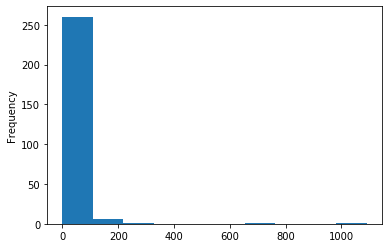

In [43]:
fires["area"].plot(kind="hist")

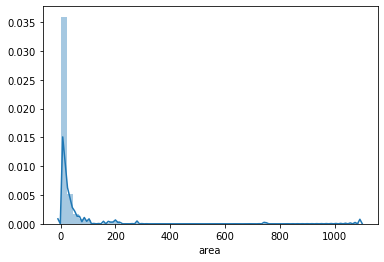

In [44]:
sns.distplot(fires['area'])

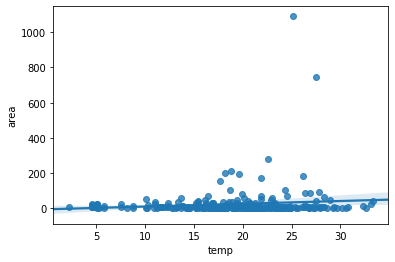

In [45]:
sns.regplot(x = 'temp', y = 'area', data = fires)